In [46]:
#Data handling 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU available: []


In [47]:
#Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # elle sera enregistre dans C:\Users\toumi\.keras\datasets\mnist.npz
# mnist.load_data() returns four arrays:
# x_train : training images
# y_train : labels (0–9) for each training image
# x_test  : test images
# y_test  : labels for each test image


print ("Dataset loaded successfully.") 
print (f"\nTraining data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print (f"\nTesting data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")
print(f"\nImage dimensions: {x_train.shape[1]} x {x_train.shape[2]} pixels")


#x_train: Training images (60,000 × 28 × 28) 
#y_train: Training labels (60,000 numbers: 0-9)
#x_test: Test images (10,000 × 28 × 28)
#y_test: Test labels (10,000 numbers: 0-9)


Dataset loaded successfully.

Training data shape: (60000, 28, 28), Training labels shape: (60000,)

Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)

Image dimensions: 28 x 28 pixels


In [48]:
print(f"\nPixel value range: [{x_train.min()}, {x_train.max()}]")

print("\nFIRST IMAGE (as numbers)")
print(f"Label: {y_train[0]}")
print("\n First 10*10 pixels of the first image: ")
print(x_train[0][:10, :10])  


Pixel value range: [0, 255]

FIRST IMAGE (as numbers)
Label: 5

 First 10*10 pixels of the first image: 
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]


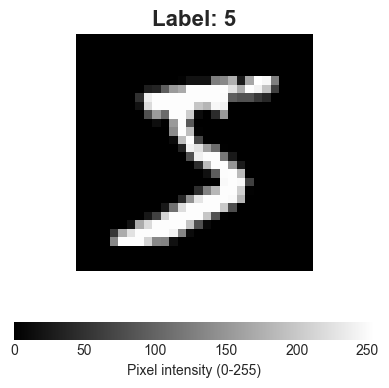

This is the digit: 5


In [49]:
plt.figure(figsize=(4,4)) 
plt.imshow(x_train[0],cmap='gray') 
plt.title(f"Label: {y_train[0]}",fontsize=16,fontweight='bold') 
plt.colorbar(label="Pixel intensity (0-255)", orientation='horizontal')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"This is the digit: {y_train[0]}")

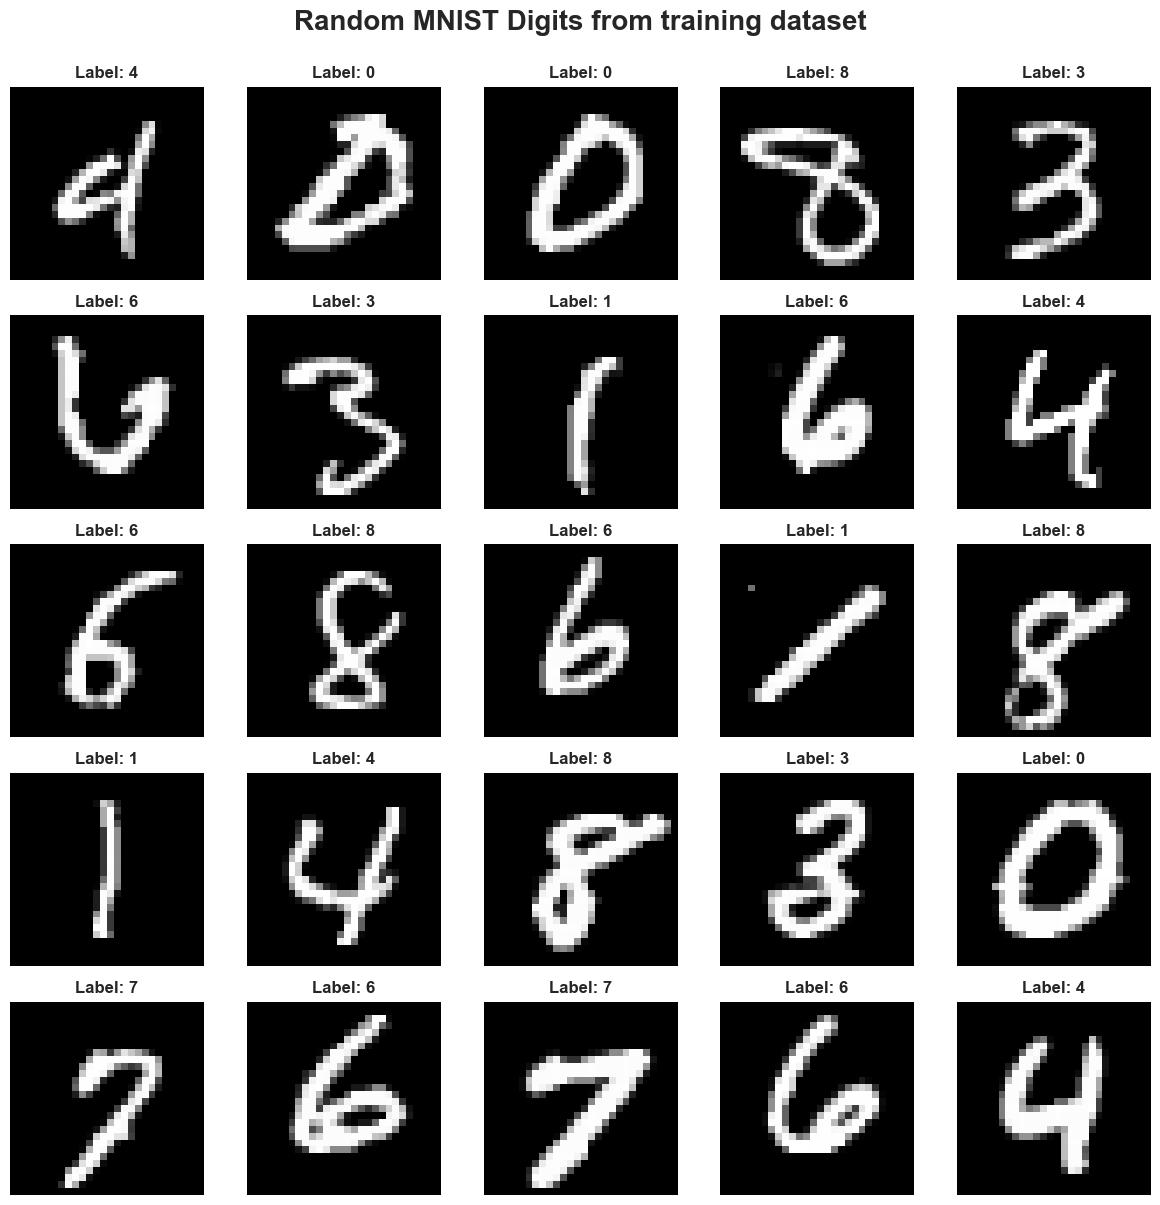

In [50]:
fig, axes = plt.subplots(5,5, figsize=(12,12)) 
fig.suptitle("Random MNIST Digits from training dataset", fontsize=20, fontweight='bold',y=1.00) 
random_indices = np.random.randint(0,len(x_train), size=25)
for i, ax in enumerate(axes.flat): 
    idx = random_indices[i]
    image = x_train[idx]
    label = y_train[idx]

    ax.imshow(image, cmap='gray') 
    ax.set_title(f"Label: {label}", fontsize=12 , fontweight='bold') 
    ax.axis('off')
plt.tight_layout() 
plt.show()

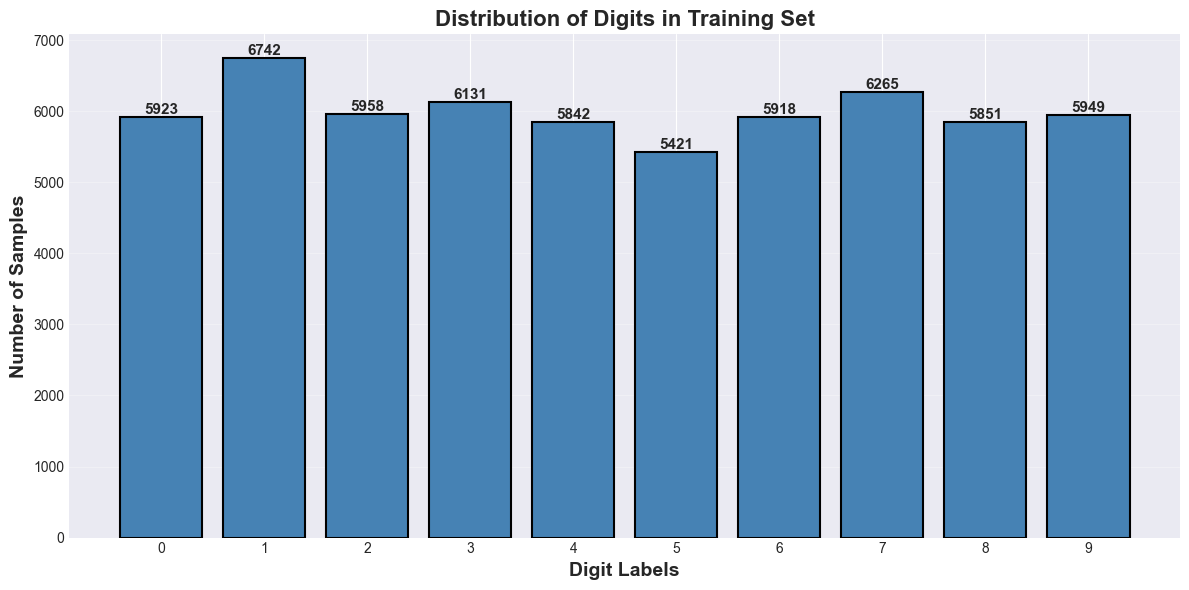


Distribution Statistics:
Digit 0: 5923 samples (9.87%)
Digit 1: 6742 samples (11.24%)
Digit 2: 5958 samples (9.93%)
Digit 3: 6131 samples (10.22%)
Digit 4: 5842 samples (9.74%)
Digit 5: 5421 samples (9.04%)
Digit 6: 5918 samples (9.86%)
Digit 7: 6265 samples (10.44%)
Digit 8: 5851 samples (9.75%)
Digit 9: 5949 samples (9.92%)


In [51]:
unique_labels, counts = np.unique(y_train, return_counts=True ) 
plt.figure(figsize=(12,6)) 
bars = plt.bar(unique_labels, counts, color='steelblue', edgecolor='black', linewidth=1.5) 

for bar in bars:
    height= bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0,height, f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.xlabel("Digit Labels", fontsize=14, fontweight='bold')
    plt.ylabel("Number of Samples", fontsize=14, fontweight='bold')

plt.title('Distribution of Digits in Training Set', fontsize=16, fontweight='bold')
plt.xticks(unique_labels)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("\nDistribution Statistics:")
for digit, count in zip(unique_labels, counts):
    percentage = (count / len(y_train)) * 100 
    print(f"Digit {digit}: {count} samples ({percentage:.2f}%)")


Pixel Value Statistics:
Mean: 33.32
Std:  78.57
Min:  0
Max:  255


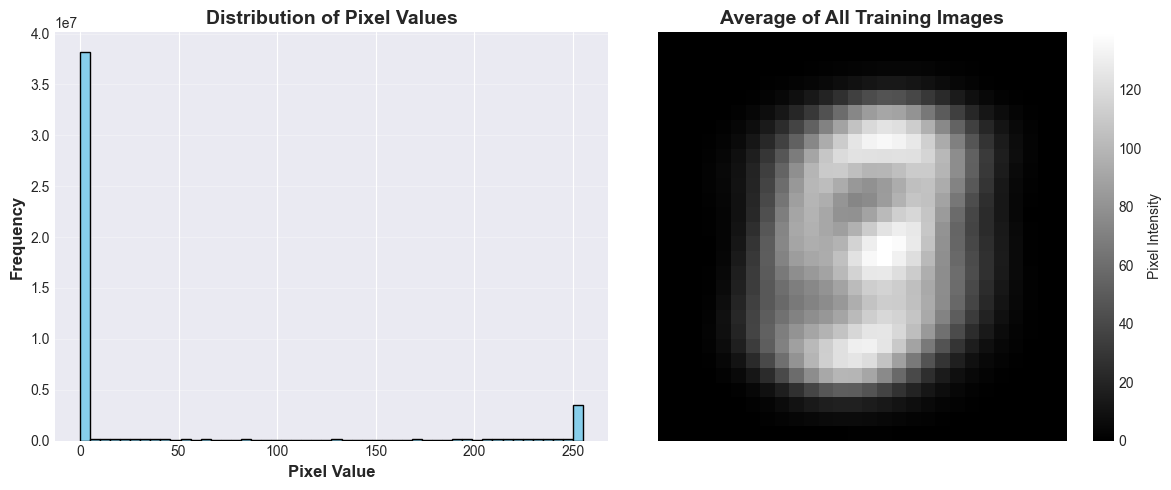

In [52]:
mean_pixel = x_train.mean() 
std_pixel = x_train.std()
min_pixel = x_train.min()
max_pixel = x_train.max()

print("Pixel Value Statistics:")
print(f"Mean: {mean_pixel:.2f}")
print(f"Std:  {std_pixel:.2f}")
print(f"Min:  {min_pixel}")
print(f"Max:  {max_pixel}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x_train.flatten(), bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Pixel Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Pixel Values', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1,2,2)
mean_image = x_train.mean(axis=0)
plt.imshow(mean_image, cmap='gray')

plt.title('Average of All Training Images', fontsize=14, fontweight='bold')
plt.colorbar(label='Pixel Intensity')
plt.axis('off')

plt.tight_layout()
plt.show()

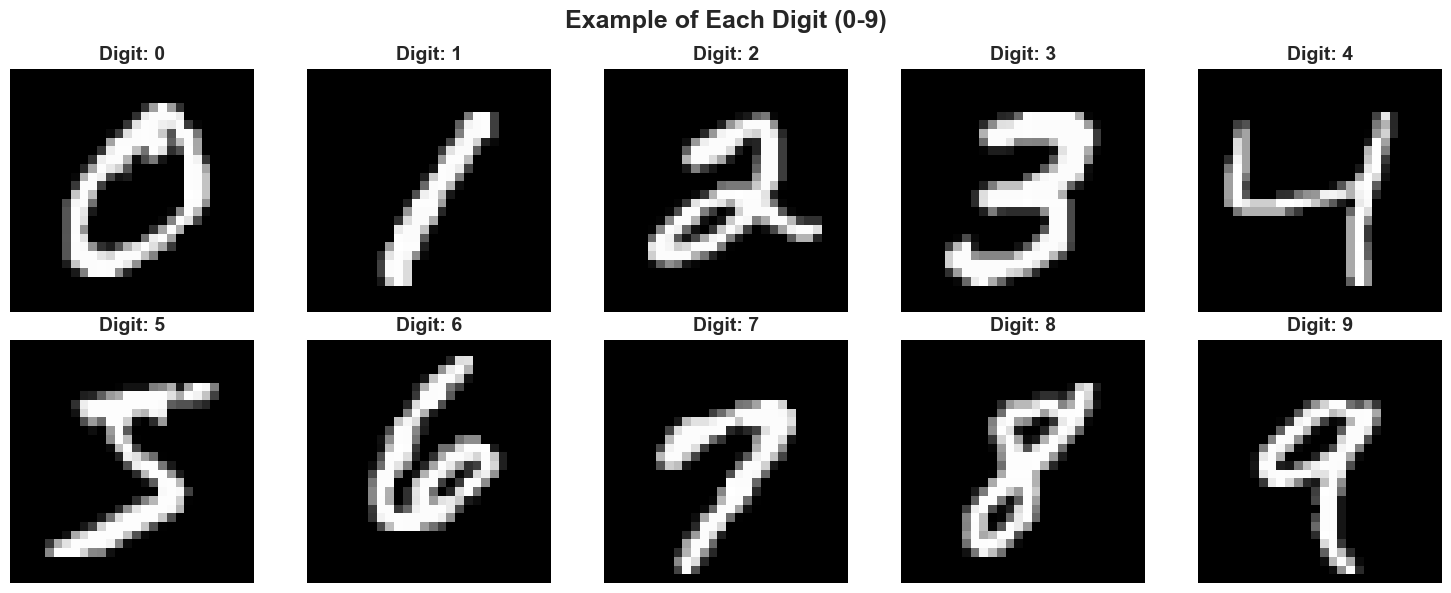

In [53]:
# Find first occurrence of each digit
digit_examples = {}
for i in range(len(y_train)):
    label = y_train[i]
    if label not in digit_examples:
        digit_examples[label] = x_train[i]
    if len(digit_examples) == 10:
        break

# Display them
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Example of Each Digit (0-9)', fontsize=18, fontweight='bold')

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    ax.imshow(digit_examples[digit], cmap='gray')
    ax.set_title(f'Digit: {digit}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [54]:
# Create a summary dictionary
summary = {
    'total_train_samples': len(x_train),
    'total_test_samples': len(x_test),
    'image_height': x_train.shape[1],
    'image_width': x_train.shape[2],
    'num_classes': len(np.unique(y_train)),
    'pixel_range': f'[{x_train.min()}, {x_train.max()}]',
    'mean_pixel_value': float(x_train.mean()),
    'std_pixel_value': float(x_train.std())
}

print("\n" + "=" * 50)
print("DATASET SUMMARY")
print("=" * 50)
for key, value in summary.items():
    print(f"{key.replace('_', ' ').title()}: {value}")
print("=" * 50)


DATASET SUMMARY
Total Train Samples: 60000
Total Test Samples: 10000
Image Height: 28
Image Width: 28
Num Classes: 10
Pixel Range: [0, 255]
Mean Pixel Value: 33.318421449829934
Std Pixel Value: 78.56748998339798


## Data Preprocessing

In [55]:
# ============================================
# ÉTAPE 1: NORMALISATION
# ============================================
print("=" * 60)
print("NORMALISATION DES DONNÉES")
print("=" * 60)

# Avant normalisation
print("\nAVANT Normalisation:")
print(f"Type de données: {x_train.dtype}")
print(f"Plage de valeurs: [{x_train.min()}, {x_train.max()}]")
print(f"Moyenne: {x_train.mean():.2f}")
print(f"Écart-type: {x_train.std():.2f}")

# Normalisation: diviser par 255.0
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("\nAPRÈS Normalisation:")
print(f"Type de données: {x_train_normalized.dtype}")
print(f"Plage de valeurs: [{x_train_normalized.min():.4f}, {x_train_normalized.max():.4f}]")
print(f"Moyenne: {x_train_normalized.mean():.4f}")
print(f"Écart-type: {x_train_normalized.std():.4f}")



NORMALISATION DES DONNÉES

AVANT Normalisation:
Type de données: uint8
Plage de valeurs: [0, 255]
Moyenne: 33.32
Écart-type: 78.57

APRÈS Normalisation:
Type de données: float32
Plage de valeurs: [0.0000, 1.0000]
Moyenne: 0.1307
Écart-type: 0.3081


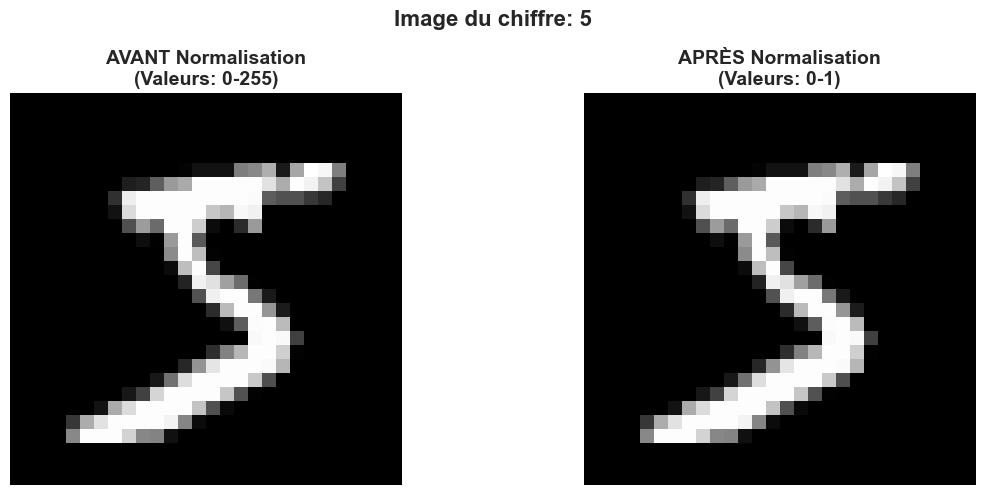


NOTE: L'image a la MÊME APPARENCE
Seuls les nombres sous-jacents ont changé!
Pixel (10,10) AVANT: 1
Pixel (10,10) APRÈS: 0.0039


In [56]:
# Comparer visuellement un même chiffre avant/après normalisation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Avant
axes[0].imshow(x_train[0], cmap='gray', vmin=0, vmax=255)
axes[0].set_title('AVANT Normalisation\n(Valeurs: 0-255)', 
                  fontsize=14, fontweight='bold')
axes[0].axis('off')

# Après
axes[1].imshow(x_train_normalized[0], cmap='gray', vmin=0, vmax=1)
axes[1].set_title('APRÈS Normalisation\n(Valeurs: 0-1)', 
                  fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.suptitle(f'Image du chiffre: {y_train[0]}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nNOTE: L'image a la MÊME APPARENCE")
print("Seuls les nombres sous-jacents ont changé!")
print(f"Pixel (10,10) AVANT: {x_train[0, 10, 10]}")
print(f"Pixel (10,10) APRÈS: {x_train_normalized[0, 10, 10]:.4f}")

In [57]:
# ============================================
# ÉTAPE 2: RESHAPING
# ============================================

print("\n" + "=" * 60)
print("RESHAPING POUR CNN")
print("=" * 60)

# Avant reshaping
print("\nAVANT Reshaping:")
print(f"x_train shape: {x_train_normalized.shape}")
print(f"x_test shape:  {x_test_normalized.shape}")

# Ajouter la dimension du canal
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)

# Après reshaping
print("\nAPRÈS Reshaping:")
print(f"x_train shape: {x_train_reshaped.shape}")
print(f"x_test shape:  {x_test_reshaped.shape}")

# Vérification: les données n'ont pas changé!
print("\nVérification:")
print(f"Même nombre total d'éléments: {x_train_normalized.size == x_train_reshaped.size}")
print(f"Les valeurs sont identiques: {np.array_equal(x_train_normalized.flatten(), x_train_reshaped.flatten())}")


RESHAPING POUR CNN

AVANT Reshaping:
x_train shape: (60000, 28, 28)
x_test shape:  (10000, 28, 28)

APRÈS Reshaping:
x_train shape: (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)

Vérification:
Même nombre total d'éléments: True
Les valeurs sont identiques: True



tructure des Données:

Pensez à x_train_reshaped comme un CUBE 4D:
┌─────────────────────────────────┐
│  Dimension 0: 60000 images      │
│  Dimension 1: 28 pixels (haut)  │
│  Dimension 2: 28 pixels (large) │
│  Dimension 3: 1 canal (gris)    │
└─────────────────────────────────┘

Une seule image = (28, 28, 1)
Toutes les images = (60000, 28, 28, 1)

0.0
1.0
float32


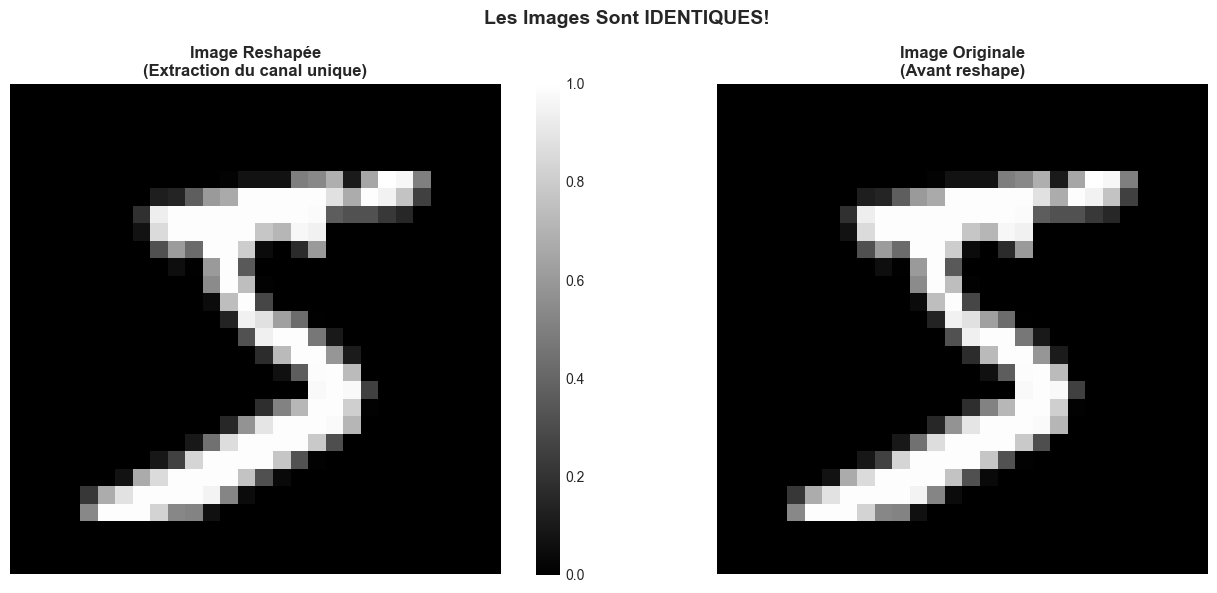

In [58]:
# Visualiser comment les données sont structurées
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)

print("\ntructure des Données:")
print(f"""
Pensez à x_train_reshaped comme un CUBE 4D:
┌─────────────────────────────────┐
│  Dimension 0: 60000 images      │
│  Dimension 1: 28 pixels (haut)  │
│  Dimension 2: 28 pixels (large) │
│  Dimension 3: 1 canal (gris)    │
└─────────────────────────────────┘

Une seule image = (28, 28, 1)
Toutes les images = (60000, 28, 28, 1)
""")
print(x_train_reshaped[0, :, :, 0].min())
print(x_train_reshaped[0, :, :, 0].max())
print(x_train_reshaped[0, :, :, 0].dtype)
# Montrer qu'on peut toujours visualiser normalement
plt.subplot(1, 2, 1)
plt.imshow(x_train_reshaped[0, :, :, 0], cmap='gray')  # Notez le [:, :, 0]
plt.title('Image Reshapée\n(Extraction du canal unique)', 
          fontsize=12, fontweight='bold')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_train_normalized[0], cmap='gray')
plt.title('Image Originale\n(Avant reshape)', 
          fontsize=12, fontweight='bold')
plt.axis('off')

plt.suptitle('Les Images Sont IDENTIQUES!', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [59]:
# ============================================
# ÉTAPE 3: ONE-HOT ENCODING
# ============================================

print("\n" + "=" * 60)
print("ONE-HOT ENCODING DES LABELS")
print("=" * 60)

# Avant one-hot
print("\nAVANT One-Hot Encoding:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Exemple des 10 premiers labels: {y_train[:10]}")
print(f"Type de données: {y_train.dtype}")

# One-hot encoding
num_classes = 10
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Après one-hot
print("\nAPRÈS One-Hot Encoding:")
print(f"y_train shape: {y_train_encoded.shape}")
print(f"y_test shape: {y_test_encoded.shape}")
print(f"Type de données: {y_train_encoded.dtype}")

print("\nExemple de Transformation:")
print(f"Label original: {y_train[0]}")
print(f"Label encodé:   {y_train_encoded[0]}")
print(f"Somme (doit être 1.0): {y_train_encoded[0].sum()}")


ONE-HOT ENCODING DES LABELS

AVANT One-Hot Encoding:
y_train shape: (60000,)
y_test shape: (10000,)
Exemple des 10 premiers labels: [5 0 4 1 9 2 1 3 1 4]
Type de données: uint8

APRÈS One-Hot Encoding:
y_train shape: (60000, 10)
y_test shape: (10000, 10)
Type de données: float64

Exemple de Transformation:
Label original: 5
Label encodé:   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Somme (doit être 1.0): 1.0


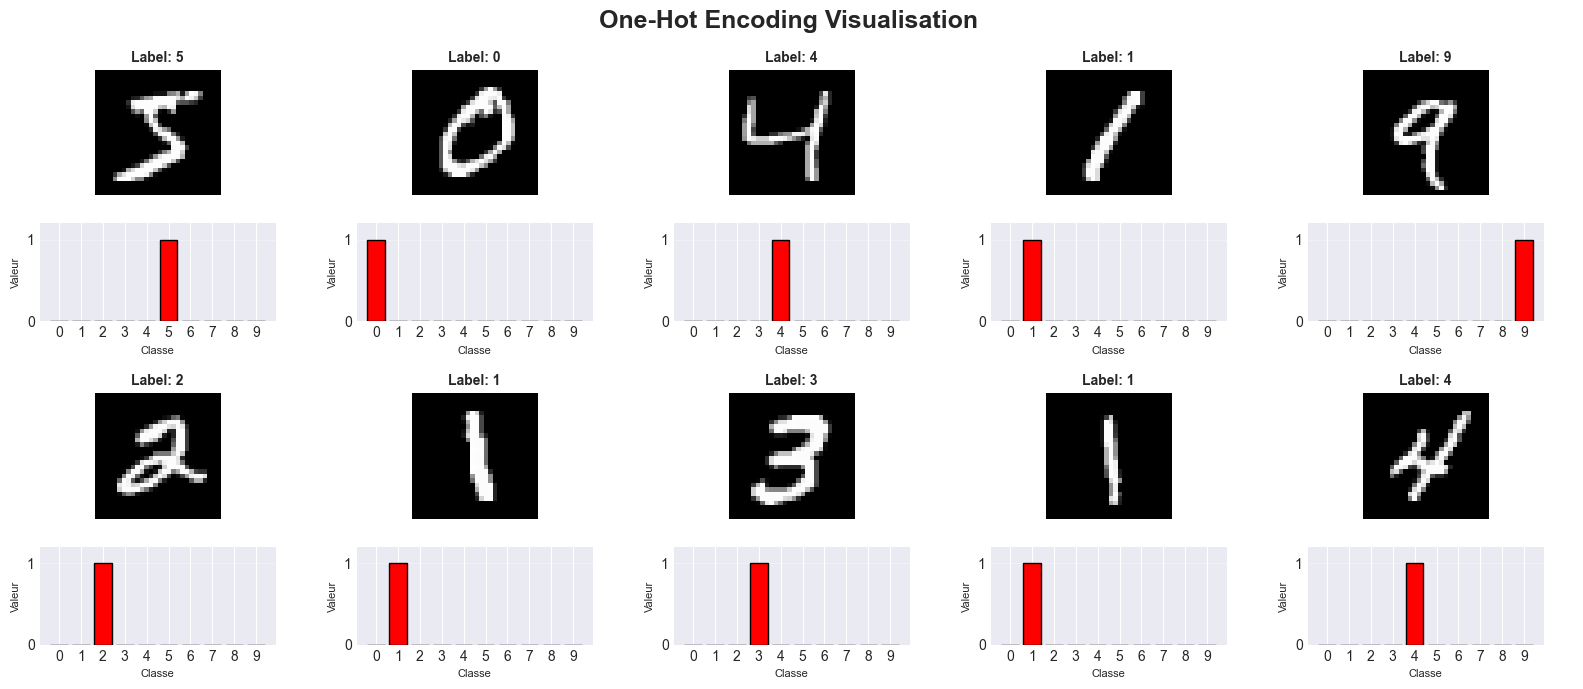


Observation:
Le vecteur a un '1' SEULEMENT à la position du chiffre
Toutes les autres positions sont '0'


In [60]:
# Visualiser le one-hot encoding pour plusieurs exemples
fig, axes = plt.subplots(2, 5, figsize=(16, 7))
fig.suptitle('One-Hot Encoding Visualisation', fontsize=18, fontweight='bold')

for i in range(10):
    ax = axes[i // 5, i % 5]
    
    # Afficher l'image
    ax_img = ax.inset_axes([0.1, 0.5, 0.8, 0.45])
    ax_img.imshow(x_train_reshaped[i, :, :, 0], cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Label: {y_train[i]}', fontsize=10, fontweight='bold')
    
    # Afficher le vecteur one-hot
    ax_bar = ax.inset_axes([0.1, 0.05, 0.8, 0.35])
    colors = ['red' if j == y_train[i] else 'lightgray' for j in range(10)]
    ax_bar.bar(range(10), y_train_encoded[i], color=colors, edgecolor='black')
    ax_bar.set_ylim([0, 1.2])
    ax_bar.set_xticks(range(10))
    ax_bar.set_yticks([0, 1])
    ax_bar.set_xlabel('Classe', fontsize=8)
    ax_bar.set_ylabel('Valeur', fontsize=8)
    ax_bar.grid(axis='y', alpha=0.3)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\nObservation:")
print("Le vecteur a un '1' SEULEMENT à la position du chiffre")
print("Toutes les autres positions sont '0'")

In [61]:
# ============================================
# ÉTAPE 4: TRAIN/VALIDATION SPLIT
# ============================================

from sklearn.model_selection import train_test_split

print("\n" + "=" * 60)
print("SÉPARATION TRAIN / VALIDATION / TEST")
print("=" * 60)

# Avant split
print("\nAVANT Split:")
print(f"Train set: {x_train_reshaped.shape[0]} images")
print(f"Test set:  {x_test_reshaped.shape[0]} images")

# Séparer 20% du train pour validation
validation_split = 0.2

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_reshaped, 
    y_train_encoded,
    test_size=validation_split,
    random_state=42,  # Pour reproductibilité
    stratify=y_train  # Garde la même distribution dans train et val
)

# Après split
print("\n✅ APRÈS Split:")
print(f"Train set:      {x_train_final.shape[0]} images ({(1-validation_split)*100:.0f}%)")
print(f"Validation set: {x_val.shape[0]} images ({validation_split*100:.0f}%)")
print(f"Test set:       {x_test_reshaped.shape[0]} images (séparé depuis le début)")

print("\n" + "=" * 60)
print("RÉSUMÉ FINAL DES DONNÉES")
print("=" * 60)
print(f"""
Données Finales Prêtes pour l'Entraînement:

TRAIN SET (pour apprendre):
  └─ x_train_final: {x_train_final.shape}
  └─ y_train_final: {y_train_final.shape}

VALIDATION SET (pour tuner):
  └─ x_val: {x_val.shape}
  └─ y_val: {y_val.shape}

TEST SET (pour évaluer):
  └─ x_test_reshaped: {x_test_reshaped.shape}
  └─ y_test_encoded: {y_test_encoded.shape}
""")


SÉPARATION TRAIN / VALIDATION / TEST

AVANT Split:
Train set: 60000 images
Test set:  10000 images

✅ APRÈS Split:
Train set:      48000 images (80%)
Validation set: 12000 images (20%)
Test set:       10000 images (séparé depuis le début)

RÉSUMÉ FINAL DES DONNÉES

Données Finales Prêtes pour l'Entraînement:

TRAIN SET (pour apprendre):
  └─ x_train_final: (48000, 28, 28, 1)
  └─ y_train_final: (48000, 10)

VALIDATION SET (pour tuner):
  └─ x_val: (12000, 28, 28, 1)
  └─ y_val: (12000, 10)

TEST SET (pour évaluer):
  └─ x_test_reshaped: (10000, 28, 28, 1)
  └─ y_test_encoded: (10000, 10)




Vérification de la Distribution:


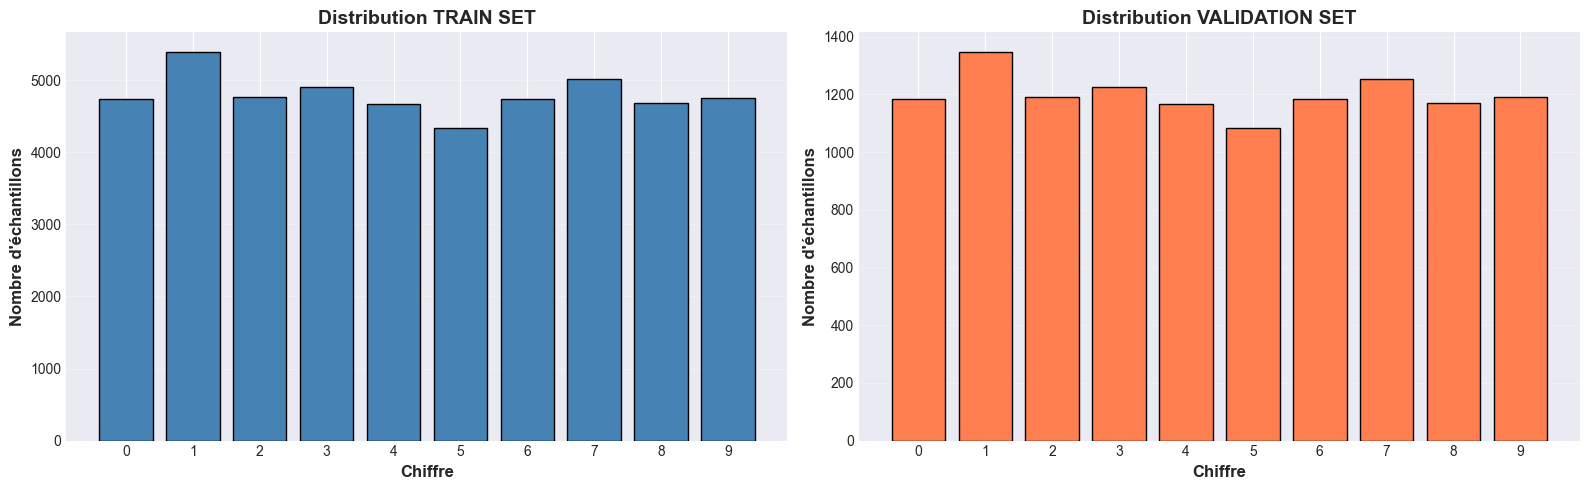


📋 Comparaison des Proportions:
------------------------------------------------------------
Chiffre    Train %         Validation %    Différence
------------------------------------------------------------
0          9.87            9.88            0.00%
1          11.24           11.23           0.00%
2          9.93            9.93            0.00%
3          10.22           10.22           0.00%
4          9.74            9.73            0.00%
5          9.04            9.03            0.00%
6          9.86            9.87            0.00%
7          10.44           10.44           0.00%
8          9.75            9.75            0.00%
9          9.91            9.92            0.00%
------------------------------------------------------------
✅ Les proportions sont TRÈS similaires grâce à stratify!


In [62]:
# Vérifier que stratify a fonctionné
print("\nVérification de la Distribution:")

# Distribution dans train
train_dist = np.argmax(y_train_final, axis=1)
unique_train, counts_train = np.unique(train_dist, return_counts=True)

# Distribution dans validation
val_dist = np.argmax(y_val, axis=1)
unique_val, counts_val = np.unique(val_dist, return_counts=True)

# Créer un tableau comparatif
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Train distribution
axes[0].bar(unique_train, counts_train, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Chiffre', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution TRAIN SET', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(10))
axes[0].grid(axis='y', alpha=0.3)

# Validation distribution
axes[1].bar(unique_val, counts_val, color='coral', edgecolor='black')
axes[1].set_xlabel('Chiffre', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution VALIDATION SET', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(10))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Tableau de comparaison
print("\n📋 Comparaison des Proportions:")
print("-" * 60)
print(f"{'Chiffre':<10} {'Train %':<15} {'Validation %':<15} {'Différence'}")
print("-" * 60)

for digit in range(10):
    train_pct = (counts_train[digit] / len(train_dist)) * 100
    val_pct = (counts_val[digit] / len(val_dist)) * 100
    diff = abs(train_pct - val_pct)
    print(f"{digit:<10} {train_pct:<15.2f} {val_pct:<15.2f} {diff:.2f}%")

print("-" * 60)
print("✅ Les proportions sont TRÈS similaires grâce à stratify!")


In [63]:
# ============================================
# SAUVEGARDE DES DONNÉES PREPROCESSÉES
# ============================================

import pickle
import os

print("\n" + "=" * 60)
print("SAUVEGARDE DES DONNÉES")
print("=" * 60)

# Créer dossier data/processed si n'existe pas
os.makedirs('../data/processed', exist_ok=True)

# Sauvegarder avec pickle
data_dict = {
    'X_train': x_train_final,
    'y_train': y_train_final,
    'X_val': x_val,
    'y_val': y_val,
    'X_test': x_test_reshaped,
    'y_test': y_test_encoded
}

with open('../data/processed/mnist_preprocessed.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print(" Données sauvegardées dans: data/processed/mnist_preprocessed.pkl")
print(f" Taille du fichier: {os.path.getsize('../data/processed/mnist_preprocessed.pkl') / 1024 / 1024:.2f} MB")




SAUVEGARDE DES DONNÉES
 Données sauvegardées dans: data/processed/mnist_preprocessed.pkl
 Taille du fichier: 214.69 MB


In [64]:
# ============================================
# CONSTRUCTION DU MODÈLE CNN COMPLET
# ============================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

print("=" * 70)
print("CONSTRUCTION DU MODÈLE CNN")
print("=" * 70)

# Initialiser le modèle séquentiel
model = Sequential(name='MNIST_CNN')

# ============================================
# BLOC 1: EXTRACTION DE FEATURES BAS NIVEAU
# ============================================
print("\n📦 BLOC 1: Convolution + Pooling (Features Simples)")

# Couche 1: Convolution (détecte bords, lignes)
model.add(Conv2D(
    filters=32,              # 32 filtres différents
    kernel_size=(3, 3),      # Fenêtre 3×3
    activation='relu',       # ReLU pour non-linéarité
    padding='same',          # Garde la taille
    input_shape=(28, 28, 1), # Premier layer: spécifier input
    name='conv2d_1'
))
print("   ├─ Conv2D: 32 filtres 3×3, ReLU, padding='same'")
print(f"   │  Output shape: (None, 28, 28, 32)")

# Couche 2: MaxPooling (réduit taille)
model.add(MaxPooling2D(
    pool_size=(2, 2),        # Fenêtre 2×2
    name='maxpool_1'
))
print("   └─ MaxPooling2D: 2×2")
print(f"      Output shape: (None, 14, 14, 32)")

# ============================================
# BLOC 2: EXTRACTION DE FEATURES HAUT NIVEAU
# ============================================
print("\n📦 BLOC 2: Convolution + Pooling (Features Complexes)")

# Couche 3: Convolution (détecte patterns complexes)
model.add(Conv2D(
    filters=64,              # DOUBLE les filtres (plus de features)
    kernel_size=(3, 3),
    activation='relu',
    padding='same',
    name='conv2d_2'
))
print("   ├─ Conv2D: 64 filtres 3×3, ReLU, padding='same'")
print(f"   │  Output shape: (None, 14, 14, 64)")

# Couche 4: MaxPooling
model.add(MaxPooling2D(
    pool_size=(2, 2),
    name='maxpool_2'
))
print("   └─ MaxPooling2D: 2×2")
print(f"      Output shape: (None, 7, 7, 64)")

# ============================================
# BLOC 3: CLASSIFICATION
# ============================================
print("\n📦 BLOC 3: Classification")

# Couche 5: Flatten (3D → 1D)
model.add(Flatten(name='flatten'))
print("   ├─ Flatten: (7, 7, 64) → (3136,)")
print(f"   │  Output shape: (None, 3136)")

# Couche 6: Dense (apprentissage de combinaisons)
model.add(Dense(
    units=128,               # 128 neurones
    activation='relu',
    name='dense_1'
))
print("   ├─ Dense: 128 neurons, ReLU")
print(f"   │  Output shape: (None, 128)")

# Couche 7: Dropout (régularisation)
model.add(Dropout(
    rate=0.5,                # Éteint 50% des neurones
    name='dropout'
))
print("   ├─ Dropout: 50%")
print(f"   │  Output shape: (None, 128)")

# Couche 8: Output (10 classes)
model.add(Dense(
    units=10,                # 10 chiffres (0-9)
    activation='softmax',    # Probabilités
    name='output'
))
print("   └─ Dense: 10 neurons, Softmax")
print(f"      Output shape: (None, 10)")

print("\n" + "=" * 70)
print("✅ MODÈLE CONSTRUIT AVEC SUCCÈS!")
print("=" * 70)

CONSTRUCTION DU MODÈLE CNN

📦 BLOC 1: Convolution + Pooling (Features Simples)
   ├─ Conv2D: 32 filtres 3×3, ReLU, padding='same'
   │  Output shape: (None, 28, 28, 32)
   └─ MaxPooling2D: 2×2
      Output shape: (None, 14, 14, 32)

📦 BLOC 2: Convolution + Pooling (Features Complexes)
   ├─ Conv2D: 64 filtres 3×3, ReLU, padding='same'
   │  Output shape: (None, 14, 14, 64)
   └─ MaxPooling2D: 2×2
      Output shape: (None, 7, 7, 64)

📦 BLOC 3: Classification
   ├─ Flatten: (7, 7, 64) → (3136,)
   │  Output shape: (None, 3136)
   ├─ Dense: 128 neurons, ReLU
   │  Output shape: (None, 128)
   ├─ Dropout: 50%
   │  Output shape: (None, 128)
   └─ Dense: 10 neurons, Softmax
      Output shape: (None, 10)

✅ MODÈLE CONSTRUIT AVEC SUCCÈS!


c:\Users\toumi\Desktop\mnist-digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# ============================================
# RÉSUMÉ DU MODÈLE
# ============================================

print("\n" + "=" * 70)
print("ARCHITECTURE COMPLÈTE DU MODÈLE")
print("=" * 70)

# Afficher summary
model.summary()

print("\n" + "=" * 70)
print("ANALYSE DES PARAMÈTRES")
print("=" * 70)

# Calculer total params
total_params = model.count_params()
trainable_params = sum([np.prod(v.shape) for v in model.trainable_weights])

print(f"\n📊 Total de paramètres: {total_params:,}")
print(f"📊 Paramètres entraînables: {trainable_params:,}")
print(f"📊 Paramètres non-entraînables: {total_params - trainable_params:,}")

# Breakdown par couche
print("\n📋 Détail par Couche:")
print("-" * 70)
print(f"{'Couche':<20} {'Type':<15} {'Paramètres':<15} {'%':<10}")
print("-" * 70)

for layer in model.layers:
    layer_params = layer.count_params()
    percentage = (layer_params / total_params) * 100 if total_params > 0 else 0
    print(f"{layer.name:<20} {layer.__class__.__name__:<15} {layer_params:<15,} {percentage:>6.2f}%")

print("-" * 70)
print(f"{'TOTAL':<20} {'':<15} {total_params:<15,} {'100.00%':>6}")
print("-" * 70)

# Insights
print("\n💡 INSIGHTS:")
print(f"   ├─ Les couches Dense représentent ~{((model.layers[-1].count_params() + model.layers[-3].count_params()) / total_params * 100):.1f}% des paramètres")
print(f"   ├─ Les couches Conv représentent seulement ~{((model.layers[0].count_params() + model.layers[2].count_params()) / total_params * 100):.1f}%")
print(f"   └─ C'est pourquoi Conv est efficace: peu de params, beaucoup d'infos!")


ARCHITECTURE COMPLÈTE DU MODÈLE


Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)


ANALYSE DES PARAMÈTRES

📊 Total de paramètres: 421,642
📊 Paramètres entraînables: 421,642
📊 Paramètres non-entraînables: 0

📋 Détail par Couche:
----------------------------------------------------------------------
Couche               Type            Paramètres      %         
----------------------------------------------------------------------
conv2d_1             Conv2D          320               0.08%
maxpool_1            MaxPooling2D    0                 0.00%
conv2d_2             Conv2D          18,496            4.39%
maxpool_2            MaxPooling2D    0                 0.00%
flatten              Flatten         0                 0.00%
dense_1              Dense           401,536          95.23%
dropout              Dropout         0                 0.00%
output               Dense           1,290             0.31%
----------------------------------------------------------------------
TOTAL                                421,642         100.00%
----------------------------


VISUALISATION DE L'ARCHITECTURE

⚠️  Impossible de créer la visualisation: name 'plot_model' is not defined
   (Ignorez cette erreur, ce n'est pas critique)

📊 Flow des Données:
----------------------------------------------------------------------
1. 🔷 Conv2D          ?                           320 params
2. 🔽 MaxPooling2D    ?                             0 params
3. 🔷 Conv2D          ?                        18,496 params
4. 🔽 MaxPooling2D    ?                             0 params
5. 📏 Flatten         ?                             0 params
6. 🧠 Dense           ?                       401,536 params
7. 🎲 Dropout         ?                             0 params
8. 🧠 Dense           ?                         1,290 params
----------------------------------------------------------------------


C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:95: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:95: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:95: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:95: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:95: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\2343671044.py:96: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) Arial.
  plt.savefig('../models/m

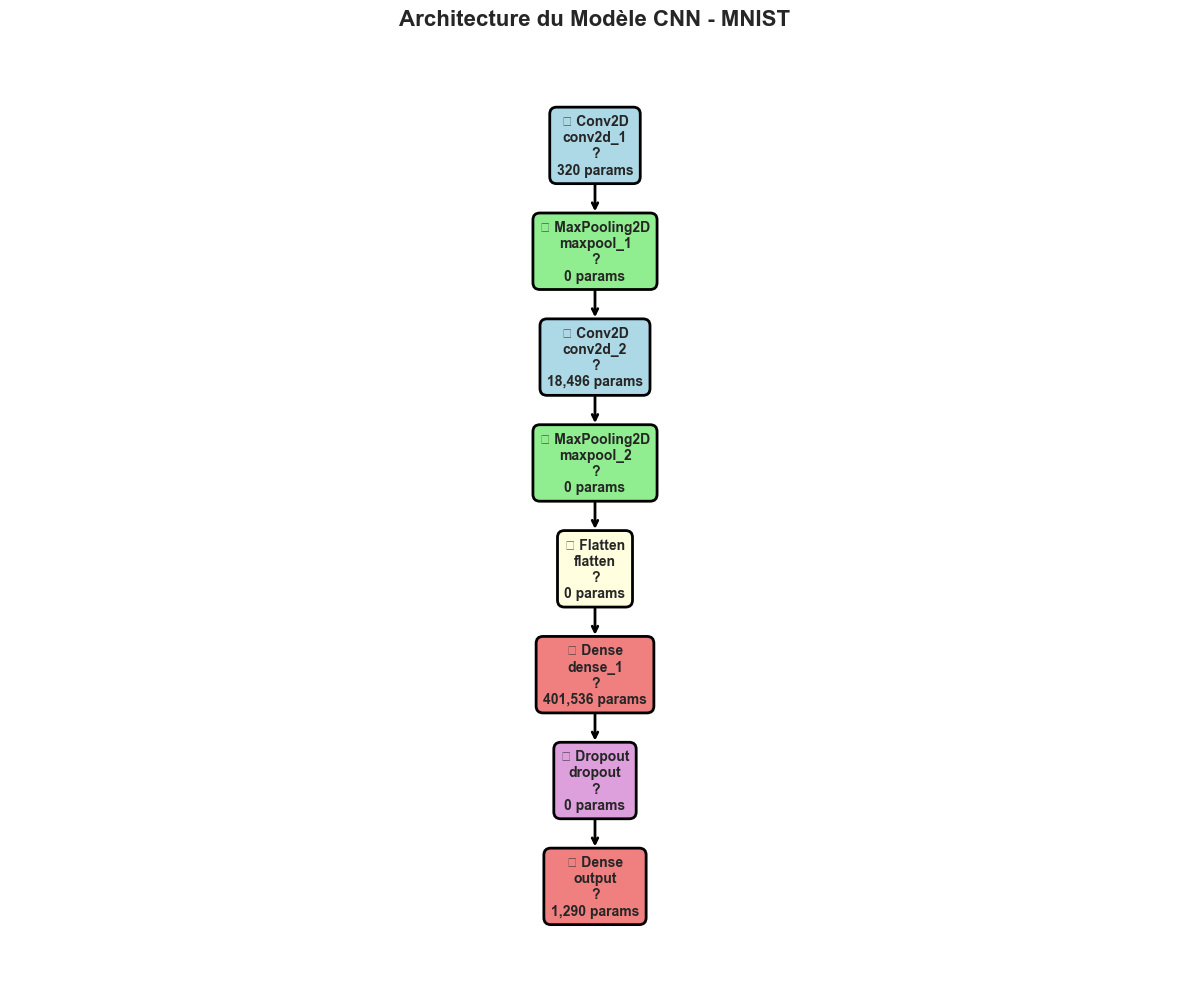


✅ Diagramme sauvegardé: models/model_flow.png


In [66]:
# ============================================
# VISUALISATION DE L'ARCHITECTURE
# ============================================

print("\n" + "=" * 70)
print("VISUALISATION DE L'ARCHITECTURE")
print("=" * 70)

# Créer une visualisation du modèle
try:
    plot_model(
        model,
        to_file='../models/model_architecture.png',
        show_shapes=True,
        show_layer_names=True,
        rankdir='TB',  # Top to Bottom
        expand_nested=True,
        dpi=96
    )
    print("\n✅ Architecture sauvegardée: models/model_architecture.png")
    
    # Afficher dans le notebook
    from IPython.display import Image, display
    display(Image('../models/model_architecture.png'))
    
except Exception as e:
    print(f"\n⚠️  Impossible de créer la visualisation: {e}")
    print("   (Ignorez cette erreur, ce n'est pas critique)")

# Créer une visualisation manuelle avec matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('off')

# Coordonnées pour dessiner les couches
y_positions = np.linspace(0.9, 0.1, len(model.layers))

print("\n📊 Flow des Données:")
print("-" * 70)

for i, (layer, y_pos) in enumerate(zip(model.layers, y_positions)):
    # Informations de la couche
    layer_name = layer.name
    layer_type = layer.__class__.__name__
    
    # Output shape
    if hasattr(layer, 'output_shape'):
        output_shape = layer.output_shape[1:]  # Ignorer batch dimension
    else:
        output_shape = "?"
    
    # Nombre de paramètres
    params = layer.count_params()
    
    # Couleur selon le type
    if 'conv' in layer_name:
        color = 'lightblue'
        emoji = '🔷'
    elif 'pool' in layer_name:
        color = 'lightgreen'
        emoji = '🔽'
    elif 'flatten' in layer_name:
        color = 'lightyellow'
        emoji = '📏'
    elif 'dense' in layer_name or 'output' in layer_name:
        color = 'lightcoral'
        emoji = '🧠'
    elif 'dropout' in layer_name:
        color = 'plum'
        emoji = '🎲'
    else:
        color = 'lightgray'
        emoji = '⚙️'
    
    # Dessiner la boîte
    bbox = dict(boxstyle='round,pad=0.5', facecolor=color, edgecolor='black', linewidth=2)
    text = f"{emoji} {layer_type}\n{layer_name}\n{output_shape}\n{params:,} params"
    ax.text(0.5, y_pos, text, ha='center', va='center', fontsize=10, 
            bbox=bbox, fontweight='bold')
    
    # Dessiner flèche vers la couche suivante
    if i < len(model.layers) - 1:
        ax.annotate('', xy=(0.5, y_positions[i+1] + 0.04), 
                   xytext=(0.5, y_pos - 0.04),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    # Afficher dans console
    print(f"{i+1}. {emoji} {layer_type:<15} {str(output_shape):<20} {params:>10,} params")

print("-" * 70)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Architecture du Modèle CNN - MNIST', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../models/model_flow.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Diagramme sauvegardé: models/model_flow.png")

In [67]:
# ============================================
# COMPILATION DU MODÈLE
# ============================================

print("\n" + "=" * 70)
print("COMPILATION DU MODÈLE")
print("=" * 70)

print("""
La compilation configure 3 éléments ESSENTIELS:

1. 🎯 OPTIMIZER (Adam): Comment ajuster les poids
2. 📉 LOSS FUNCTION (Categorical Crossentropy): Mesurer l'erreur
3. 📊 METRICS (Accuracy): Suivre la performance
""")

# Compiler le modèle
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ Modèle compilé avec:")
print("   ├─ Optimizer:      Adam (lr=0.001)")
print("   ├─ Loss Function:  Categorical Crossentropy")
print("   └─ Metrics:        Accuracy")

print("\n" + "=" * 70)
print("🔍 EXPLICATION DES CHOIX")
print("=" * 70)

print("""
🎯 ADAM OPTIMIZER:
   ├─ Adaptive Moment Estimation
   ├─ Combine momentum + RMSprop
   ├─ Learning rate: 0.001 (standard)
   ├─ Ajuste automatiquement le learning rate par paramètre
   └─ ✅ Meilleur choix pour la plupart des cas

📉 CATEGORICAL CROSSENTROPY:
   ├─ Pour classification multi-classes (>2)
   ├─ Mesure la "distance" entre prédiction et vérité
   ├─ Formule: -Σ(y_true × log(y_pred))
   └─ ✅ Standard pour softmax output

📊 ACCURACY:
   ├─ Pourcentage de prédictions correctes
   ├─ Simple et interprétable
   └─ ✅ Parfait pour MNIST (classes équilibrées)
""")


COMPILATION DU MODÈLE

La compilation configure 3 éléments ESSENTIELS:

1. 🎯 OPTIMIZER (Adam): Comment ajuster les poids
2. 📉 LOSS FUNCTION (Categorical Crossentropy): Mesurer l'erreur
3. 📊 METRICS (Accuracy): Suivre la performance


✅ Modèle compilé avec:
   ├─ Optimizer:      Adam (lr=0.001)
   ├─ Loss Function:  Categorical Crossentropy
   └─ Metrics:        Accuracy

🔍 EXPLICATION DES CHOIX

🎯 ADAM OPTIMIZER:
   ├─ Adaptive Moment Estimation
   ├─ Combine momentum + RMSprop
   ├─ Learning rate: 0.001 (standard)
   ├─ Ajuste automatiquement le learning rate par paramètre
   └─ ✅ Meilleur choix pour la plupart des cas

📉 CATEGORICAL CROSSENTROPY:
   ├─ Pour classification multi-classes (>2)
   ├─ Mesure la "distance" entre prédiction et vérité
   ├─ Formule: -Σ(y_true × log(y_pred))
   └─ ✅ Standard pour softmax output

📊 ACCURACY:
   ├─ Pourcentage de prédictions correctes
   ├─ Simple et interprétable
   └─ ✅ Parfait pour MNIST (classes équilibrées)



C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\3163662908.py:75: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_17480\3163662908.py:75: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()



DEEP DIVE: CATEGORICAL CROSSENTROPY

📐 EXEMPLE DE CALCUL:

Vérité:     [0 0 0 1 0 0 0 0 0 0]
            (C'est un 3)

✅ BONNE Prédiction:
   Probs:   [0.05  0.03  0.02  0.85  0.01  0.01  0.01  0.01  0.005 0.005]
   Loss:    0.1625
   → Le modèle est 85% sûr que c'est un 3
   → Loss FAIBLE (bon!)

❌ MAUVAISE Prédiction:
   Probs:   [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
   Loss:    2.3026
   → Le modèle est incertain (10% pour chaque classe)
   → Loss ÉLEVÉE (mauvais!)

💡 Ratio: Loss mauvaise / Loss bonne = 14.17x
   → L'optimiseur va ajuster les poids pour MINIMISER cette loss


c:\Users\toumi\Desktop\mnist-digit-recognition\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\toumi\Desktop\mnist-digit-recognition\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


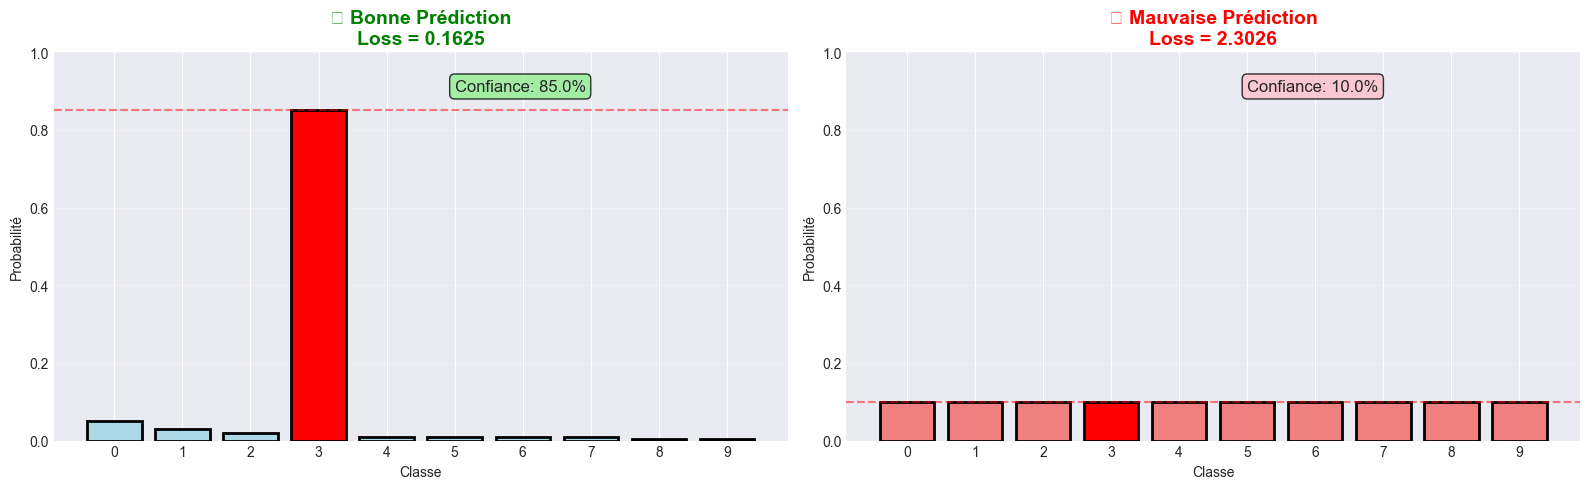

In [68]:
# ============================================
# COMPRENDRE: CATEGORICAL CROSSENTROPY
# ============================================

print("\n" + "=" * 70)
print("DEEP DIVE: CATEGORICAL CROSSENTROPY")
print("=" * 70)

# Exemple de calcul
y_true = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])  # One-hot: c'est un 3
y_pred_good = np.array([0.05, 0.03, 0.02, 0.85, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005])  # Bonne prédiction
y_pred_bad = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Mauvaise prédiction (uniforme)

def categorical_crossentropy(y_true, y_pred):
    """Calcul manuel de la crossentropy"""
    # Éviter log(0)
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Calculer
    return -np.sum(y_true * np.log(y_pred))

loss_good = categorical_crossentropy(y_true, y_pred_good)
loss_bad = categorical_crossentropy(y_true, y_pred_bad)

print("\n📐 EXEMPLE DE CALCUL:")
print(f"\nVérité:     {y_true}")
print(f"            (C'est un 3)")

print(f"\n✅ BONNE Prédiction:")
print(f"   Probs:   {y_pred_good}")
print(f"   Loss:    {loss_good:.4f}")
print(f"   → Le modèle est 85% sûr que c'est un 3")
print(f"   → Loss FAIBLE (bon!)")

print(f"\n❌ MAUVAISE Prédiction:")
print(f"   Probs:   {y_pred_bad}")
print(f"   Loss:    {loss_bad:.4f}")
print(f"   → Le modèle est incertain (10% pour chaque classe)")
print(f"   → Loss ÉLEVÉE (mauvais!)")

print(f"\n💡 Ratio: Loss mauvaise / Loss bonne = {loss_bad/loss_good:.2f}x")
print(f"   → L'optimiseur va ajuster les poids pour MINIMISER cette loss")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bonne prédiction
axes[0].bar(range(10), y_pred_good, color=['red' if i==3 else 'lightblue' for i in range(10)],
           edgecolor='black', linewidth=2)
axes[0].set_title(f'✅ Bonne Prédiction\nLoss = {loss_good:.4f}', 
                 fontsize=14, fontweight='bold', color='green')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Probabilité')
axes[0].set_xticks(range(10))
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=y_pred_good[3], color='red', linestyle='--', alpha=0.5)
axes[0].text(5, 0.9, f'Confiance: {y_pred_good[3]*100:.1f}%', 
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8), fontsize=12)

# Mauvaise prédiction
axes[1].bar(range(10), y_pred_bad, color=['red' if i==3 else 'lightcoral' for i in range(10)],
           edgecolor='black', linewidth=2)
axes[1].set_title(f'❌ Mauvaise Prédiction\nLoss = {loss_bad:.4f}', 
                 fontsize=14, fontweight='bold', color='red')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Probabilité')
axes[1].set_xticks(range(10))
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=y_pred_bad[3], color='red', linestyle='--', alpha=0.5)
axes[1].text(5, 0.9, f'Confiance: {y_pred_bad[3]*100:.1f}%', 
            bbox=dict(boxstyle='round', facecolor='pink', alpha=0.8), fontsize=12)

plt.tight_layout()
plt.show()

In [69]:
# ============================================
# SAUVEGARDER LE MODÈLE (Architecture + Config)
# ============================================

import os
import json

print("\n" + "=" * 70)
print("SAUVEGARDE DU MODÈLE")
print("=" * 70)

# Créer dossier models si n'existe pas
os.makedirs('../models', exist_ok=True)

# Sauvegarder l'architecture en JSON
model_json = model.to_json()
with open('../models/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print("\n✅ Architecture sauvegardée: models/model_architecture.json")

# Sauvegarder la config de compilation
config = {
    'optimizer': 'Adam',
    'learning_rate': 0.001,
    'loss': 'categorical_crossentropy',
    'metrics': ['accuracy'],
    'total_params': int(model.count_params()),
    'trainable_params': int(sum([tf.size(w).numpy() for w in model.trainable_weights]))
}

with open('../models/model_config.json', 'w') as f:
    json.dump(config, f, indent=4)
print("✅ Configuration sauvegardée: models/model_config.json")

# Afficher ce qu'on a sauvegardé
print("\n📦 Fichiers créés:")
print("   ├─ models/model_architecture.json  (Structure du réseau)")
print("   ├─ models/model_config.json        (Paramètres de compilation)")
print("   ├─ models/model_architecture.png   (Diagramme Keras)")
print("   └─ models/model_flow.png           (Diagramme flow)")

print("\n💡 Ces fichiers sont IMPORTANTS pour la documentation!")
print("   On pourra recréer exactement le même modèle plus tard.")



SAUVEGARDE DU MODÈLE

✅ Architecture sauvegardée: models/model_architecture.json
✅ Configuration sauvegardée: models/model_config.json

📦 Fichiers créés:
   ├─ models/model_architecture.json  (Structure du réseau)
   ├─ models/model_config.json        (Paramètres de compilation)
   ├─ models/model_architecture.png   (Diagramme Keras)
   └─ models/model_flow.png           (Diagramme flow)

💡 Ces fichiers sont IMPORTANTS pour la documentation!
   On pourra recréer exactement le même modèle plus tard.


In [70]:
# ============================================
# DAY 4: ENTRAÎNEMENT DU MODÈLE
# ============================================

print("=" * 70)
print("DAY 4: ENTRAÎNEMENT DU MODÈLE")
print("=" * 70)

# Import required callbacks (fix NameError: EarlyStopping not defined)
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ============================================
# CONFIGURER LES CALLBACKS
# ============================================

print("\n" + "=" * 70)
print("CONFIGURATION DES CALLBACKS")
print("=" * 70)

print("""
Les CALLBACKS sont des outils qui surveillent l'entraînement:

1. 🛑 EarlyStopping: Arrête si pas d'amélioration
2. 💾 ModelCheckpoint: Sauvegarde le meilleur modèle
3. 📉 ReduceLROnPlateau: Réduit learning rate si stagnation
""")

# 1. Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',          # Surveiller la validation loss
    patience=5,                  # Attendre 5 epochs sans amélioration
    restore_best_weights=True,   # Restaurer les meilleurs poids
    verbose=1,
    mode='min'                   # min = on veut minimiser val_loss
)

print("\n✅ EarlyStopping configuré:")
print("   ├─ Monitor: val_loss")
print("   ├─ Patience: 5 epochs")
print("   └─ Restore best weights: True")
print("\n   💡 Si val_loss ne s'améliore pas pendant 5 epochs → STOP!")

# 2. Model Checkpoint
checkpoint = ModelCheckpoint(
    filepath='../models/best_model.keras',  # Où sauvegarder
    monitor='val_accuracy',       # Surveiller val_accuracy
    save_best_only=True,          # Sauvegarder seulement si meilleur
    mode='max',                   # max = on veut maximiser accuracy
    verbose=1
)

print("\n✅ ModelCheckpoint configuré:")
print("   ├─ Filepath: models/best_model.keras")
print("   ├─ Monitor: val_accuracy")
print("   └─ Save best only: True")
print("\n   💡 Sauvegarde automatique quand val_accuracy s'améliore!")

# 3. Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                   # Réduire LR de moitié
    patience=3,                   # Attendre 3 epochs
    min_lr=1e-7,                  # LR minimum
    verbose=1,
    mode='min'
)

print("\n✅ ReduceLROnPlateau configuré:")
print("   ├─ Monitor: val_loss")
print("   ├─ Factor: 0.5 (LR × 0.5)")
print("   ├─ Patience: 3 epochs")
print("   └─ Min LR: 1e-7")
print("\n   💡 Si val_loss stagne → Réduit learning rate!")
print("      Exemple: 0.001 → 0.0005 → 0.00025 → ...")

# Grouper tous les callbacks
callbacks_list = [early_stopping, checkpoint, reduce_lr]

print("\n" + "=" * 70)
print("POURQUOI CES CALLBACKS?")
print("=" * 70)

print("""
🛑 EarlyStopping:
   Sans: Le modèle continue même si overfitting
         Train acc: 99.9% ✓ mais Val acc: 85% ✗
   Avec: Arrête dès que validation se dégrade
         Économise du temps!

💾 ModelCheckpoint:
   Sans: Si entraînement crashe → Tout perdu
         Si dernière epoch overfits → Mauvais modèle
   Avec: TOUJOURS le meilleur modèle sauvegardé
         Peut reprendre si problème

📉 ReduceLROnPlateau:
   Learning rate trop haut → Oscille autour du minimum
   Learning rate trop bas → Progresse trop lentement
   Solution: Commencer haut, réduire progressivement
   
   Epoch 1-10:  LR=0.001 (explore rapidement)
   Epoch 11-15: LR=0.0005 (affine)
   Epoch 16+:   LR=0.00025 (converge précisément)
""")

DAY 4: ENTRAÎNEMENT DU MODÈLE

CONFIGURATION DES CALLBACKS

Les CALLBACKS sont des outils qui surveillent l'entraînement:

1. 🛑 EarlyStopping: Arrête si pas d'amélioration
2. 💾 ModelCheckpoint: Sauvegarde le meilleur modèle
3. 📉 ReduceLROnPlateau: Réduit learning rate si stagnation


✅ EarlyStopping configuré:
   ├─ Monitor: val_loss
   ├─ Patience: 5 epochs
   └─ Restore best weights: True

   💡 Si val_loss ne s'améliore pas pendant 5 epochs → STOP!

✅ ModelCheckpoint configuré:
   ├─ Filepath: models/best_model.keras
   ├─ Monitor: val_accuracy
   └─ Save best only: True

   💡 Sauvegarde automatique quand val_accuracy s'améliore!

✅ ReduceLROnPlateau configuré:
   ├─ Monitor: val_loss
   ├─ Factor: 0.5 (LR × 0.5)
   ├─ Patience: 3 epochs
   └─ Min LR: 1e-7

   💡 Si val_loss stagne → Réduit learning rate!
      Exemple: 0.001 → 0.0005 → 0.00025 → ...

POURQUOI CES CALLBACKS?

🛑 EarlyStopping:
   Sans: Le modèle continue même si overfitting
         Train acc: 99.9% ✓ mais Val acc: 85%

In [71]:
# ============================================
# DÉFINIR LES HYPERPARAMÈTRES
# ============================================

print("\n" + "=" * 70)
print("HYPERPARAMÈTRES D'ENTRAÎNEMENT")
print("=" * 70)

# Hyperparamètres
BATCH_SIZE = 32
EPOCHS = 20
VALIDATION_SPLIT = None  # On a déjà séparé train/val

print(f"\n📊 Configuration:")
print(f"   ├─ Batch Size: {BATCH_SIZE}")
print(f"   ├─ Epochs: {EPOCHS}")
print(f"   ├─ Train samples: {len(x_train)}")
print(f"   ├─ Val samples: {len(x_val)}")
print(f"   └─ Steps per epoch: {len(x_train) // BATCH_SIZE}")

print(f"\n💡 Calculs:")
total_batches = (len(x_train) // BATCH_SIZE) * EPOCHS
total_weight_updates = total_batches
training_time_estimate = total_batches * 0.05  # ~50ms par batch

print(f"   ├─ Total batches: {total_batches:,}")
print(f"   ├─ Total weight updates: {total_weight_updates:,}")
print(f"   └─ Temps estimé: ~{training_time_estimate/60:.1f} minutes")

print("\n" + "=" * 70)
print("QU'EST-CE QU'UN HYPERPARAMÈTRE?")
print("=" * 70)

print("""
PARAMÈTRES (appris par le modèle):
├─ Poids des Conv filters
├─ Biais de chaque couche
└─ → Le modèle APPREND ces valeurs

HYPERPARAMÈTRES (définis par VOUS):
├─ Batch size
├─ Nombre d'epochs
├─ Learning rate
├─ Architecture (nb de layers, filtres, etc.)
└─ → VOUS choisissez ces valeurs

💡 L'art du Deep Learning = Choisir les bons hyperparamètres!
""")


HYPERPARAMÈTRES D'ENTRAÎNEMENT

📊 Configuration:
   ├─ Batch Size: 32
   ├─ Epochs: 20
   ├─ Train samples: 60000
   ├─ Val samples: 12000
   └─ Steps per epoch: 1875

💡 Calculs:
   ├─ Total batches: 37,500
   ├─ Total weight updates: 37,500
   └─ Temps estimé: ~31.2 minutes

QU'EST-CE QU'UN HYPERPARAMÈTRE?

PARAMÈTRES (appris par le modèle):
├─ Poids des Conv filters
├─ Biais de chaque couche
└─ → Le modèle APPREND ces valeurs

HYPERPARAMÈTRES (définis par VOUS):
├─ Batch size
├─ Nombre d'epochs
├─ Learning rate
├─ Architecture (nb de layers, filtres, etc.)
└─ → VOUS choisissez ces valeurs

💡 L'art du Deep Learning = Choisir les bons hyperparamètres!



In [72]:
# ============================================
# ENTRAÎNEMENT DU MODÈLE
# ============================================
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("\n" + "=" * 70)
print("🚀 DÉBUT DE L'ENTRAÎNEMENT")
print("=" * 70)

print("\n⏰ Ceci peut prendre 5-10 minutes...")
print("☕ Prenez un café et observez la magie opérer!\n")

import time
start_time = time.time()

# ENTRAÎNER!
# Use the preprocessed + split datasets (x_train_final / y_train_final) which are
# already reshaped and one-hot encoded to match the model's expected input/output.
history = model.fit(
    x_train_final, y_train_final,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=callbacks_list,
    verbose=1  # Affiche la progression
)

end_time = time.time()
training_duration = end_time - start_time

print("\n" + "=" * 70)
print("✅ ENTRAÎNEMENT TERMINÉ!")
print("=" * 70)

print(f"\n⏱️  Temps d'entraînement: {training_duration/60:.2f} minutes")
print(f"📊 Epochs complétées: {len(history.history['loss'])}")

# Résultats finaux
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n📈 RÉSULTATS FINAUX:")
print(f"   Train Loss:     {final_train_loss:.4f}")
print(f"   Train Accuracy: {final_train_acc*100:.2f}%")
print(f"   Val Loss:       {final_val_loss:.4f}")
print(f"   Val Accuracy:   {final_val_acc*100:.2f}%")

# Meilleurs résultats
best_val_acc = max(history.history['val_accuracy'])
best_val_acc_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print(f"\n🏆 MEILLEURE PERFORMANCE:")
print(f"   Epoch: {best_val_acc_epoch}")
print(f"   Val Accuracy: {best_val_acc*100:.2f}%")

# Overfitting check
gap = (final_train_acc - final_val_acc) * 100
print(f"\n🔍 OVERFITTING CHECK:")
print(f"   Gap (Train - Val): {gap:.2f}%")
if gap < 5:
    print("   ✅ Excellent! Pas d'overfitting significatif")
elif gap < 10:
    print("   ⚠️  Léger overfitting, mais acceptable")
else:
    print("   ❌ Overfitting détecté! Considérer plus de régularisation")



🚀 DÉBUT DE L'ENTRAÎNEMENT

⏰ Ceci peut prendre 5-10 minutes...
☕ Prenez un café et observez la magie opérer!

Epoch 1/20
1493/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8564 - loss: 0.4551
Epoch 1: val_accuracy improved from None to 0.97617, saving model to ../models/best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9307 - loss: 0.2286 - val_accuracy: 0.9762 - val_loss: 0.0822 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9737 - loss: 0.0917
Epoch 2: val_accuracy improved from 0.97617 to 0.98133, saving model to ../models/best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9752 - loss: 0.0836 - val_accuracy: 0.9813 - val_loss: 0.0634 - learning_rate: 0.0010
Epoch 3/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9808 - loss: 0.0628
Epoch 3: val_accuracy improved from 0.98133 to 0.98508, saving model to ../models/best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step


VISUALISATION DES COURBES D'APPRENTISSAGE


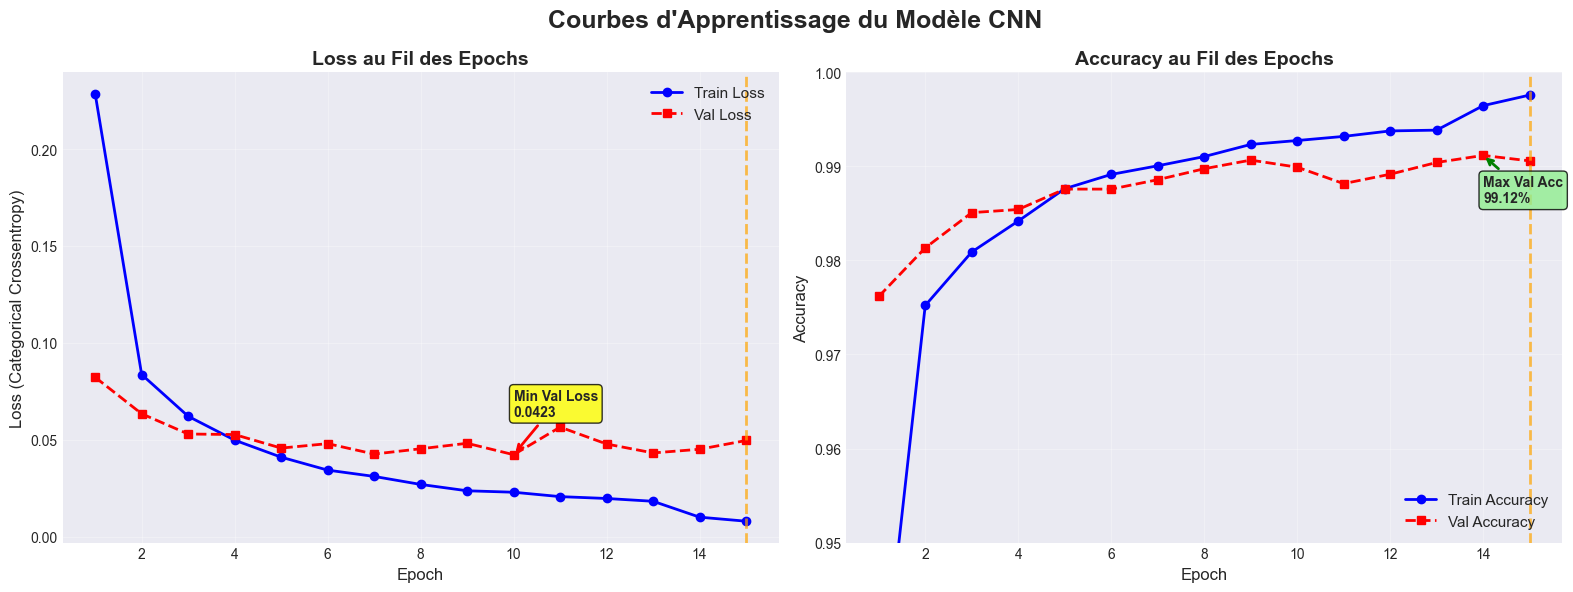


✅ Graphique sauvegardé: models/training_history.png


In [73]:
# ============================================
# VISUALISER LES COURBES D'APPRENTISSAGE
# ============================================

print("\n" + "=" * 70)
print("VISUALISATION DES COURBES D'APPRENTISSAGE")
print("=" * 70)

# Extraire l'historique
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_loss) + 1)

# Créer les graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Courbes d\'Apprentissage du Modèle CNN', fontsize=18, fontweight='bold')

# Plot 1: Loss
axes[0].plot(epochs_range, train_loss, 'b-o', linewidth=2, markersize=6, label='Train Loss')
axes[0].plot(epochs_range, val_loss, 'r--s', linewidth=2, markersize=6, label='Val Loss')
axes[0].set_title('Loss au Fil des Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (Categorical Crossentropy)', fontsize=12)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Annoter le meilleur point
min_val_loss_idx = np.argmin(val_loss)
axes[0].annotate(f'Min Val Loss\n{val_loss[min_val_loss_idx]:.4f}',
                xy=(min_val_loss_idx+1, val_loss[min_val_loss_idx]),
                xytext=(min_val_loss_idx+1, val_loss[min_val_loss_idx] + 0.02),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# Plot 2: Accuracy
axes[1].plot(epochs_range, train_acc, 'b-o', linewidth=2, markersize=6, label='Train Accuracy')
axes[1].plot(epochs_range, val_acc, 'r--s', linewidth=2, markersize=6, label='Val Accuracy')
axes[1].set_title('Accuracy au Fil des Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(loc='lower right', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.95, 1.0])  # Zoom sur la partie intéressante

# Annoter le meilleur point
max_val_acc_idx = np.argmax(val_acc)
axes[1].annotate(f'Max Val Acc\n{val_acc[max_val_acc_idx]*100:.2f}%',
                xy=(max_val_acc_idx+1, val_acc[max_val_acc_idx]),
                xytext=(max_val_acc_idx+1, val_acc[max_val_acc_idx] - 0.005),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Marquer où EarlyStopping s'est arrêté
axes[0].axvline(x=len(train_loss), color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Early Stop')
axes[1].axvline(x=len(train_loss), color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Early Stop')

plt.tight_layout()
plt.savefig('../models/training_history.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé: models/training_history.png")

In [74]:
# ============================================
# ANALYSE DÉTAILLÉE DES RÉSULTATS
# ============================================

import pandas as pd

print("\n" + "=" * 70)
print("ANALYSE DÉTAILLÉE DE L'ENTRAÎNEMENT")
print("=" * 70)

# Créer un DataFrame pour analyse
history_df = pd.DataFrame({
    'Epoch': epochs_range,
    'Train_Loss': train_loss,
    'Val_Loss': val_loss,
    'Train_Acc': [f"{acc*100:.2f}%" for acc in train_acc],
    'Val_Acc': [f"{acc*100:.2f}%" for acc in val_acc]
})

print("\n📊 Historique Complet:")
print(history_df.to_string(index=False))

# Statistiques
print("\n" + "=" * 70)
print("STATISTIQUES CLÉS")
print("=" * 70)

print(f"\n📉 ÉVOLUTION DE LA LOSS:")
print(f"   Train Loss:")
print(f"      Initial: {train_loss[0]:.4f}")
print(f"      Final:   {train_loss[-1]:.4f}")
print(f"      Réduction: {((train_loss[0]-train_loss[-1])/train_loss[0]*100):.1f}%")
print(f"\n   Val Loss:")
print(f"      Initial: {val_loss[0]:.4f}")
print(f"      Minimum: {min(val_loss):.4f} (Epoch {np.argmin(val_loss)+1})")
print(f"      Final:   {val_loss[-1]:.4f}")

print(f"\n📈 ÉVOLUTION DE L'ACCURACY:")
print(f"   Train Accuracy:")
print(f"      Initial: {train_acc[0]*100:.2f}%")
print(f"      Final:   {train_acc[-1]*100:.2f}%")
print(f"      Amélioration: +{(train_acc[-1]-train_acc[0])*100:.2f}%")
print(f"\n   Val Accuracy:")
print(f"      Initial: {val_acc[0]*100:.2f}%")
print(f"      Maximum: {max(val_acc)*100:.2f}% (Epoch {np.argmax(val_acc)+1})")
print(f"      Final:   {val_acc[-1]*100:.2f}%")

# Learning Rate (si disponible)
if 'lr' in history.history:
    lr_history = history.history['lr']
    print(f"\n📉 LEARNING RATE:")
    print(f"   Initial: {lr_history[0]:.6f}")
    print(f"   Final:   {lr_history[-1]:.6f}")
    
    # Trouver quand LR a changé
    lr_changes = []
    for i in range(1, len(lr_history)):
        if lr_history[i] != lr_history[i-1]:
            lr_changes.append(f"Epoch {i+1}: {lr_history[i-1]:.6f} → {lr_history[i]:.6f}")
    
    if lr_changes:
        print(f"   Changements:")
        for change in lr_changes:
            print(f"      {change}")

print(f"\n🎯 CONVERGENCE:")
print(f"   Epochs utilisés: {len(train_loss)}/20")
print(f"   ✅ EarlyStopping a arrêté l'entraînement")
print(f"   💡 Optimal: Le modèle a trouvé son meilleur point!")

# Performance finale
print("\n" + "=" * 70)
print("🏆 PERFORMANCE FINALE")
print("=" * 70)
print(f"""
Sur 12,000 images de VALIDATION:
   ✅ Correctes: {int(val_acc[-1] * 12000):,} images
   ❌ Erreurs:   {int((1-val_acc[-1]) * 12000):,} images
   
   Taux de succès: {val_acc[-1]*100:.2f}%
   Taux d'erreur:  {(1-val_acc[-1])*100:.2f}%
""")


ANALYSE DÉTAILLÉE DE L'ENTRAÎNEMENT

📊 Historique Complet:
 Epoch  Train_Loss  Val_Loss Train_Acc Val_Acc
     1    0.228595  0.082224    93.07%  97.62%
     2    0.083641  0.063385    97.52%  98.13%
     3    0.062094  0.052943    98.09%  98.51%
     4    0.049768  0.052662    98.42%  98.54%
     5    0.040985  0.045674    98.76%  98.76%
     6    0.034303  0.047972    98.91%  98.76%
     7    0.031051  0.042592    99.01%  98.86%
     8    0.026913  0.045325    99.10%  98.98%
     9    0.023638  0.048149    99.23%  99.07%
    10    0.022889  0.042262    99.27%  98.99%
    11    0.020622  0.056508    99.32%  98.82%
    12    0.019663  0.047778    99.38%  98.92%
    13    0.018219  0.043176    99.39%  99.04%
    14    0.010019  0.045072    99.65%  99.12%
    15    0.007931  0.049593    99.76%  99.06%

STATISTIQUES CLÉS

📉 ÉVOLUTION DE LA LOSS:
   Train Loss:
      Initial: 0.2286
      Final:   0.0079
      Réduction: 96.5%

   Val Loss:
      Initial: 0.0822
      Minimum: 0.0423 (Epo

In [75]:
# ============================================
# SAUVEGARDER L'HISTORIQUE
# ============================================

print("\n" + "=" * 70)
print("SAUVEGARDE DE L'HISTORIQUE")
print("=" * 70)

# Sauvegarder en pickle
with open('../models/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
print("\n✅ Historique sauvegardé: models/training_history.pkl")

# Sauvegarder en CSV
history_df.to_csv('../models/training_history.csv', index=False)
print("✅ Historique sauvegardé: models/training_history.csv")

# Créer un résumé JSON
summary = {
    'training_duration_minutes': round(training_duration / 60, 2),
    'epochs_completed': len(train_loss),
    'epochs_requested': EPOCHS,
    'early_stopped': len(train_loss) < EPOCHS,
    'batch_size': BATCH_SIZE,
    
    'best_val_accuracy': float(max(val_acc)),
    'best_val_accuracy_epoch': int(np.argmax(val_acc) + 1),
    'best_val_loss': float(min(val_loss)),
    'best_val_loss_epoch': int(np.argmin(val_loss) + 1),
    
    'final_train_accuracy': float(train_acc[-1]),
    'final_train_loss': float(train_loss[-1]),
    'final_val_accuracy': float(val_acc[-1]),
    'final_val_loss': float(val_loss[-1]),
    
    'overfitting_gap_percent': float((train_acc[-1] - val_acc[-1]) * 100),
    
    'initial_learning_rate': 0.001,
    'final_learning_rate': float(history.history['lr'][-1]) if 'lr' in history.history else 0.001
}

with open('../models/training_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)
print("✅ Résumé sauvegardé: models/training_summary.json")

print("\n📦 Tous les fichiers sauvegardés:")
print("   ├─ models/best_model.keras         (Meilleur modèle - Epoch 14)")
print("   ├─ models/training_history.pkl     (Historique complet)")
print("   ├─ models/training_history.csv     (Tableau CSV)")
print("   ├─ models/training_history.png     (Graphiques)")
print("   └─ models/training_summary.json    (Résumé JSON)")

print("\n💡 Vous pouvez maintenant utiliser ce modèle pour:")
print("   ├─ Prédire de nouveaux chiffres")
print("   ├─ Analyser les erreurs (confusion matrix)")
print("   ├─ Créer l'application Streamlit")
print("   └─ Le déployer en production!")


SAUVEGARDE DE L'HISTORIQUE

✅ Historique sauvegardé: models/training_history.pkl
✅ Historique sauvegardé: models/training_history.csv
✅ Résumé sauvegardé: models/training_summary.json

📦 Tous les fichiers sauvegardés:
   ├─ models/best_model.keras         (Meilleur modèle - Epoch 14)
   ├─ models/training_history.pkl     (Historique complet)
   ├─ models/training_history.csv     (Tableau CSV)
   ├─ models/training_history.png     (Graphiques)
   └─ models/training_summary.json    (Résumé JSON)

💡 Vous pouvez maintenant utiliser ce modèle pour:
   ├─ Prédire de nouveaux chiffres
   ├─ Analyser les erreurs (confusion matrix)
   ├─ Créer l'application Streamlit
   └─ Le déployer en production!
